## KNN implementation on Gene Expression Data Set (Not Generalized)

## Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 

## Data Set

In [2]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [3]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [4]:
df.iloc[0]

Gene One          4.3
Gene Two          3.9
Cancer Present    1.0
Name: 0, dtype: float64

In [5]:
df.iloc[0][0]

4.3

In [6]:
n = len(df.columns)

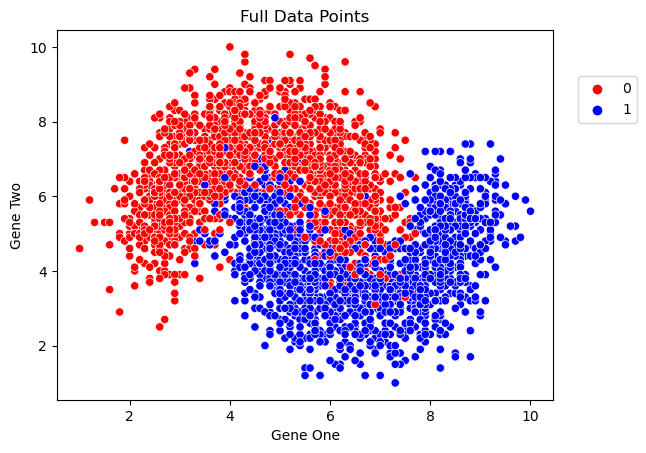

In [9]:
color_dict = {0:'red',1:'blue','Test Point':'green'}
markers_dict = {0:'o',1:'o','Test Point':'X'}

sns.scatterplot(x = df['Gene One'],y = df['Gene Two'],hue=df['Cancer Present'],palette=color_dict,style=df['Cancer Present'],markers=markers_dict)
plt.title('Full Data Points')
plt.legend(loc=(1.05,0.75))

## Determing the value of K

In [47]:
len(df)

3000

In [48]:
k = math.floor(math.sqrt(len(df)))

if k%2==0 :
    k = k + 1

print(k)

55


## Train Test split

In [49]:
train_percentage = 70
test_percentage = 100 - train_percentage

print('Train Percentage :',train_percentage)
print('Test Percentage :',test_percentage)

Train Percentage : 70
Test Percentage : 30


In [50]:
no_of_train_data = math.ceil((train_percentage * len(df)) / 100)
print('No of train data :',no_of_train_data)

no_of_test_data = len(df) - no_of_train_data
print('No of test data',no_of_test_data)

No of train data : 2100
No of test data 900


In [51]:
df.head(no_of_train_data)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2095,6.9,6.0,0
2096,7.2,4.4,0
2097,6.0,3.4,1
2098,4.2,8.5,0


In [52]:
df_train = df.head(no_of_train_data)
df_train

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2095,6.9,6.0,0
2096,7.2,4.4,0
2097,6.0,3.4,1
2098,4.2,8.5,0


In [53]:
df.tail(no_of_test_data)

,Gene One,Gene Two,Cancer Present
2100,4.7,2.9,1
2101,6.7,3.2,1
2102,7.3,1.0,1
2103,2.8,5.7,0
2104,5.5,3.8,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [54]:
df_test = df.tail(no_of_test_data)
df_test

,Gene One,Gene Two,Cancer Present
2100,4.7,2.9,1
2101,6.7,3.2,1
2102,7.3,1.0,1
2103,2.8,5.7,0
2104,5.5,3.8,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [55]:
df_test = df_test.reset_index()
df_test

,index,Gene One,Gene Two,Cancer Present
0,2100,4.7,2.9,1
1,2101,6.7,3.2,1
2,2102,7.3,1.0,1
3,2103,2.8,5.7,0
4,2104,5.5,3.8,1
...,...,...,...,...
895,2995,5.0,6.5,1
896,2996,3.4,6.6,0
897,2997,2.7,6.5,0
898,2998,3.3,5.6,0


In [56]:
df_test = df_test.drop('index',axis=1)
df_test

,Gene One,Gene Two,Cancer Present
0,4.7,2.9,1
1,6.7,3.2,1
2,7.3,1.0,1
3,2.8,5.7,0
4,5.5,3.8,1
...,...,...,...
895,5.0,6.5,1
896,3.4,6.6,0
897,2.7,6.5,0
898,3.3,5.6,0


In [57]:
df_temp = df.copy()
df_temp

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [58]:
df_temp['Cancer Present'][no_of_train_data:] = ['Test Point'] * no_of_test_data
df_temp

C:\Users\HP\AppData\Local\Temp\ipykernel_9072\2074753982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Cancer Present'][no_of_train_data:] = ['Test Point'] * no_of_test_data


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,Test Point
2996,3.4,6.6,Test Point
2997,2.7,6.5,Test Point
2998,3.3,5.6,Test Point


In [59]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


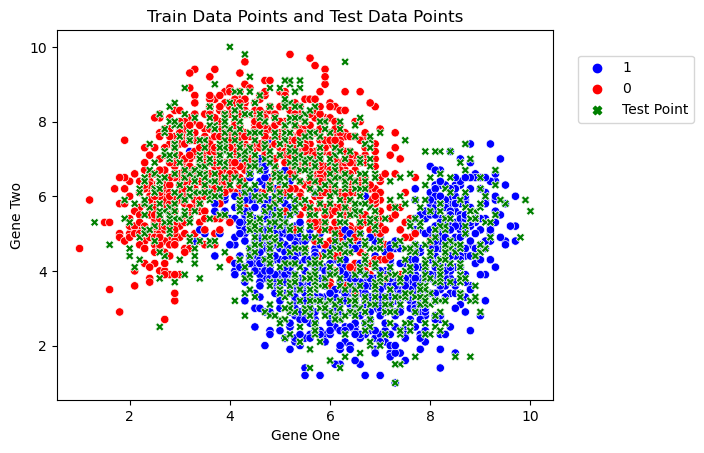

In [60]:
color_dict = {0:'red',1:'blue','Test Point':'green'}
markers_dict = {0:'o',1:'o','Test Point':'X'}
sns.scatterplot(x = df_temp['Gene One'],y = df_temp['Gene Two'],hue=df_temp['Cancer Present'],palette=color_dict,style=df_temp['Cancer Present'],markers=markers_dict)
plt.title('Train Data Points and Test Data Points')
plt.legend(loc=(1.05,0.75))

# hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]


## Calculating Euclean Distance from Test point to Train point , sorting it ascending order and then finding the nearest neighbor

In [61]:
df_train

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2095,6.9,6.0,0
2096,7.2,4.4,0
2097,6.0,3.4,1
2098,4.2,8.5,0


In [62]:
df_test

,Gene One,Gene Two,Cancer Present
0,4.7,2.9,1
1,6.7,3.2,1
2,7.3,1.0,1
3,2.8,5.7,0
4,5.5,3.8,1
...,...,...,...
895,5.0,6.5,1
896,3.4,6.6,0
897,2.7,6.5,0
898,3.3,5.6,0


In [63]:
df_test.iloc[0]

Gene One          4.7
Gene Two          2.9
Cancer Present    1.0
Name: 0, dtype: float64

In [64]:
df_train.iloc[0][0]

4.3

In [65]:
df_train['Cancer Present'][0]

1

In [66]:
distance_list = list()
class_name_list = list()

# calculating euclidean distance from test data to train data

for i in range(len(df_test)):
    for j in range(len(df_train)):
        distance = math.sqrt((df_test.iloc[i][0]-df_train.iloc[j][0])**2 + (df_test.iloc[i][1]-df_train.iloc[j][1])**2)
        distance_list.append((df_train['Cancer Present'][j],distance))
    
    
    # sorting all those distances

    for ii in range(len(distance_list)):
        for jj in range(ii+1,len(distance_list)):
            if distance_list[jj][1] < distance_list[ii][1]:
                temp = distance_list[ii]
                distance_list[ii] = distance_list[jj]
                distance_list[jj] = temp
    

    # selecting first 'k' points and then counting the number of classes
    
    count = dict()
    for ii in range(k):
        if distance_list[ii][0] not in count:
            count[distance_list[ii][0]] = 1
        else:
            count[distance_list[ii][0]] = count[distance_list[ii][0]] + 1
    
    
    # finding out the most nearest class

    min = 0
    for ii in count:
        if count[ii] > min:
            class_name = ii
            min = count[ii]
    
    class_name_list.append(class_name)
    distance_list = list()

print(class_name_list)

[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 

In [74]:
print(len(class_name_list))

900


In [75]:
df_temp2 = df.copy()
df_temp2

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [76]:
df_temp2['Cancer Present'][no_of_train_data:] = class_name_list
df_temp2

C:\Users\HP\AppData\Local\Temp\ipykernel_9072\1625209426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['Cancer Present'][no_of_train_data:] = class_name_list


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,0
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


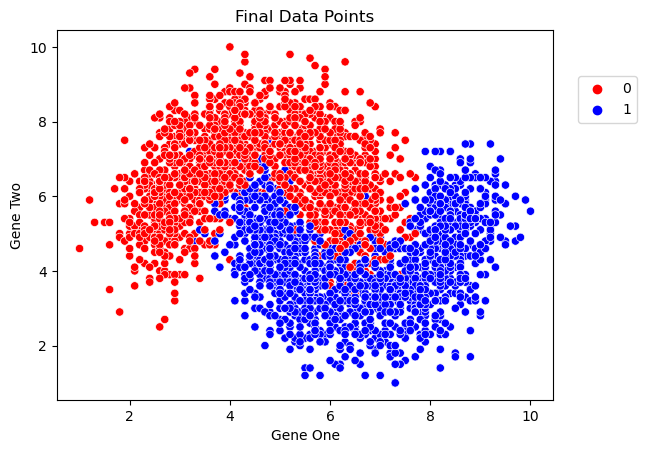

In [77]:
color_dict = {0:'red',1:'blue','Test Point':'green'}
markers_dict = {0:'o',1:'o','Test Point':'X'}

sns.scatterplot(x = df_temp2['Gene One'],y = df_temp2['Gene Two'],hue=df_temp2['Cancer Present'],palette=color_dict,style=df['Cancer Present'],markers=markers_dict)
plt.title('Final Data Points')
plt.legend(loc=(1.05,0.75))

Text(0.5, 1.0, 'Final Data Points')

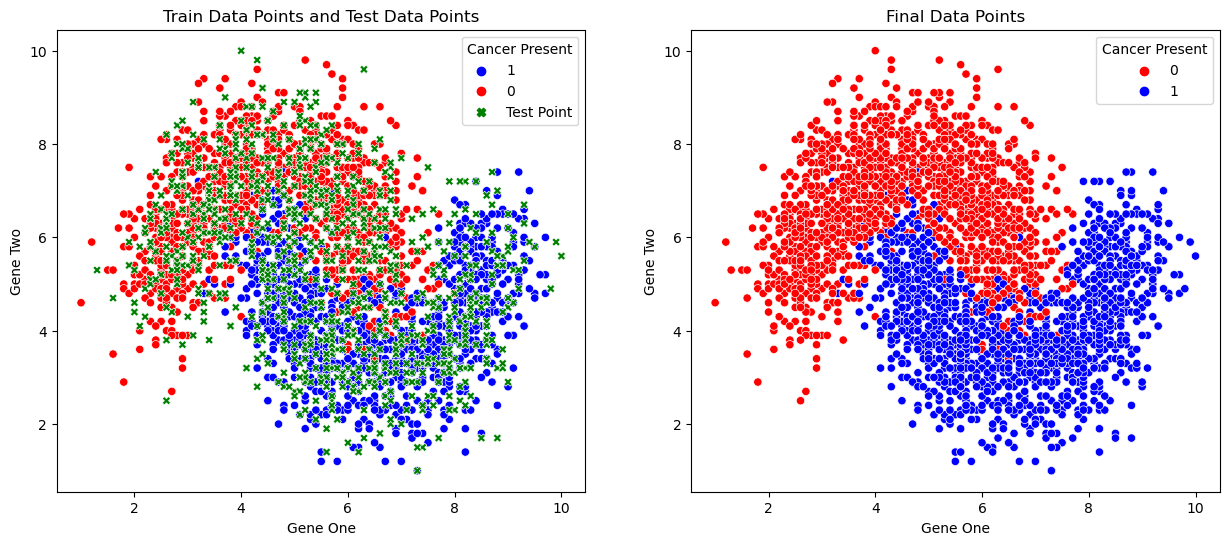

In [78]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1

color_dict = {0:'red',1:'blue','Test Point':'green'}
markers_dict = {0:'o',1:'o','Test Point':'X'}
sns.scatterplot(x = df_temp['Gene One'],y = df_temp['Gene Two'],hue=df_temp['Cancer Present'],palette=color_dict,style=df_temp['Cancer Present'],markers=markers_dict)
plt.title('Train Data Points and Test Data Points')

# hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]





plt.subplot(1, 2, 2) # index 2


color_dict = {0:'red',1:'blue','Test Point':'green'}
markers_dict = {0:'o',1:'o','Test Point':'X'}
sns.scatterplot(x = df_temp2['Gene One'],y = df_temp2['Gene Two'],hue=df_temp2['Cancer Present'],palette=color_dict,style=df['Cancer Present'],markers=markers_dict)
plt.title('Final Data Points')

In [79]:
right = 0
wrong = 0

for i in range(len(class_name_list)):
    if class_name_list[i] == df_test['Cancer Present'][i]:
        right = right + 1
    else:
        wrong = wrong + 1

print(right,wrong)

848 52


In [80]:
accuarcy = (right * 100) / len(class_name_list)
print(accuarcy)

94.22222222222223
